rename
map
unique

In [4]:
import seaborn as sns

In [5]:
tips = sns.load_dataset("tips")
df = tips.copy()

In [6]:
df.head() #ilk 5 satır gösterir

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [7]:
df.tail() #son 5 satırı gösterir

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [8]:
df.describe().T #genel bilgileri gösterir , T ise yan çevirir

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


In [9]:
df.rename(columns = {"total_bill":"fiyat",
                     "tip":"bahsis",
                     "sex":"cinsiyet",
                     "smoker":"sigara",
                     "day":"gün",
                     "time":"zaman",
                     "size":"kişi sayısı"},
          inplace = True) #inpalce değişikliğin kaydedilmesine yarıyor
df.head()


,fiyat,bahsis,cinsiyet,sigara,gün,zaman,kişi sayısı
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# Sütun Değerlerinin Değiştirilmesi

In [11]:
df["cinsiyet"] = df.cinsiyet.map({"Female":"Kadın","Male":"Erkek"})
#değişiklikleri kaydetmek için o sütuna atama yapmamız gerek

cinsiyet

In [13]:
df.cinsiyet.unique() # verilen sütunda kaç tane farklı tür olduğunu bulmak için kullanılır

['Kadın', 'Erkek']
Categories (2, object): ['Erkek', 'Kadın']

sigara

In [15]:
df.sigara.unique()

['No', 'Yes']
Categories (2, object): ['Yes', 'No']

In [24]:
df["sigara"] = df.sigara.map({"No":"Hayır","Yes":"Evet"})

gün

In [28]:
df.gün.unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

In [30]:
df["gün"] = df.gün.map({"Sun":"Pazar","Sat":"Cumartesi","Thur":"Perşembe","Fri":"Cuma"})

In [32]:
df

,fiyat,bahsis,cinsiyet,sigara,gün,zaman,kişi sayısı
0,16.99,1.01,Kadın,Hayır,Pazar,Dinner,2
1,10.34,1.66,Erkek,Hayır,Pazar,Dinner,3
2,21.01,3.50,Erkek,Hayır,Pazar,Dinner,3
3,23.68,3.31,Erkek,Hayır,Pazar,Dinner,2
4,24.59,3.61,Kadın,Hayır,Pazar,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Erkek,Hayır,Cumartesi,Dinner,3
240,27.18,2.00,Kadın,Evet,Cumartesi,Dinner,2
241,22.67,2.00,Erkek,Evet,Cumartesi,Dinner,2
242,17.82,1.75,Erkek,Hayır,Cumartesi,Dinner,2


zaman

In [35]:
df.zaman.unique()

['Dinner', 'Lunch']
Categories (2, object): ['Lunch', 'Dinner']

In [37]:
df["zaman"] = df.zaman.map({"Dinner":"Akşam Yemeği","Lunch":"Öğle Yemepi"})

In [39]:
df

,fiyat,bahsis,cinsiyet,sigara,gün,zaman,kişi sayısı
0,16.99,1.01,Kadın,Hayır,Pazar,Akşam Yemeği,2
1,10.34,1.66,Erkek,Hayır,Pazar,Akşam Yemeği,3
2,21.01,3.50,Erkek,Hayır,Pazar,Akşam Yemeği,3
3,23.68,3.31,Erkek,Hayır,Pazar,Akşam Yemeği,2
4,24.59,3.61,Kadın,Hayır,Pazar,Akşam Yemeği,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Erkek,Hayır,Cumartesi,Akşam Yemeği,3
240,27.18,2.00,Kadın,Evet,Cumartesi,Akşam Yemeği,2
241,22.67,2.00,Erkek,Evet,Cumartesi,Akşam Yemeği,2
242,17.82,1.75,Erkek,Hayır,Cumartesi,Akşam Yemeği,2


# Veri Setini Göreselleştirme

In [42]:
import matplotlib.pyplot as plt

In [44]:
df.gün.value_counts() # satırdaki türlerden kaçar tane olduğunu gösterir

gün
Cumartesi    87
Pazar        76
Perşembe     62
Cuma         19
Name: count, dtype: int64

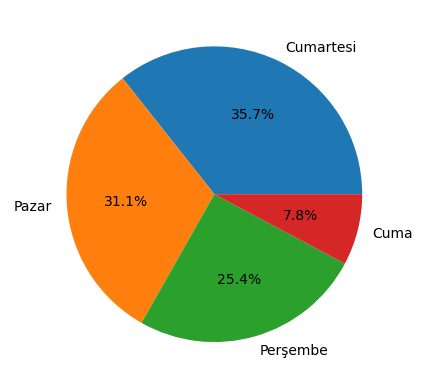

In [46]:
df.gün.value_counts().plot(kind = "pie" , autopct = "%.1f%%")
plt.ylabel(" ");
# kind grafiğin türünü belirler
# autopct grafiğin üstünde yüzdelikleirnin çıkmasını sağlar
# ylabel yan taraftayı yazıyı kaldır sonundaki ; ise gereksiz yazıyı gizler

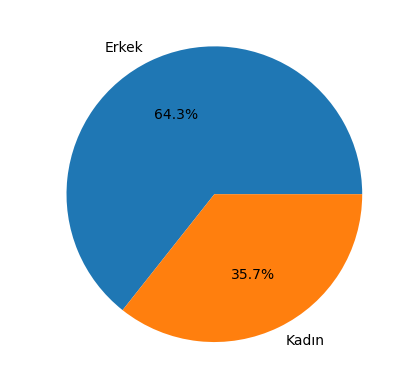

In [48]:
df.cinsiyet.value_counts().plot(kind = "pie" , autopct = "%.1f%%")
plt.ylabel(" ");

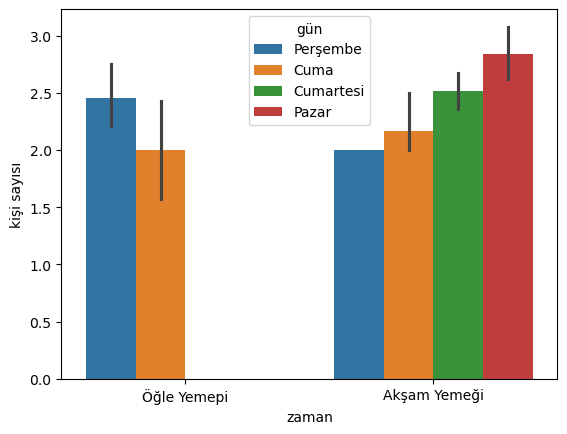

In [50]:
sns.barplot(x = "zaman", y = "kişi sayısı" , hue = "gün", data=df);
# x ve y verilen grafiklerin elemanları hue da ek olarka eklemke istediğimiz eleman 

# Verilerin Sayısal Hale Getirilmesi

cinsiyet

In [59]:
df["cinsiyet"] = df.cinsiyet.map({"Kadın":1,"Erkek":2})

sigara

In [67]:
df.sigara.unique()

['Hayır', 'Evet']
Categories (2, object): ['Evet', 'Hayır']

In [82]:
df["sigara"] = df.sigara.map({"Evet":1,"Hayır":2})

günler

In [87]:
df["gün"] = df.gün.map({"Perşembe":1,"Cuma":2,"Cumartesi":3,"Pazar":4})

Öğün

In [99]:
df["zaman"] = df.zaman.map({"Öğle Yemepi":1,"Akşam Yemeği":2})

In [101]:
df

,fiyat,bahsis,cinsiyet,sigara,gün,zaman,kişi sayısı
0,16.99,1.01,1,2,4,2,2
1,10.34,1.66,2,2,4,2,3
2,21.01,3.50,2,2,4,2,3
3,23.68,3.31,2,2,4,2,2
4,24.59,3.61,1,2,4,2,4
...,...,...,...,...,...,...,...
239,29.03,5.92,2,2,3,2,3
240,27.18,2.00,1,1,3,2,2
241,22.67,2.00,2,1,3,2,2
242,17.82,1.75,2,2,3,2,2
